In [52]:
import pandas as pd
import os

database_path = "/mnt/L-HDD/dataset/"

beatmaps_csv = os.path.join(database_path, "beatmaps.csv")
hit_objects_csv = os.path.join(database_path, "hit_objects.csv")
time_points_csv = os.path.join(database_path, "timing_points.csv")

beatmaps_df = pd.read_csv(beatmaps_csv)
hit_objects_df = pd.read_csv(hit_objects_csv)
time_points_df = pd.read_csv(time_points_csv)


In [89]:
import requests
from dotenv import load_dotenv

load_dotenv()

def get_access_token():
    url = "https://osu.ppy.sh/oauth/token"
    headers = {"Content-Type": "application/x-www-form-urlencoded"}
    data = {
        "client_id": CLIENT_ID,
        "client_secret": CLIENT_SECRET,
        "grant_type": "client_credentials",
        "scope": "public"
    }
    
    response = requests.post(url, headers=headers, data=data)
    return response.json().get("access_token")

def get_beatmapset_status(beatmapset_id, access_token):
    url = f"https://osu.ppy.sh/api/v2/beatmapsets/{beatmapset_id}"
    headers = {"Authorization": f"Bearer {access_token}", "Accept": "application/json"}
    
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        beatmapset = response.json()
        status = beatmapset.get("status", "Unknown")
        return f"Beatmapset {beatmapset_id} Status: {status}"
    else:
        return f"Error: {response.status_code} - {response.text}"

access_token = get_access_token()


In [93]:
beatmapset_ids = set(beatmaps_df["ID"].str.split("-").str[0])

In [99]:
import time
results = {}
for beatmapset_id in beatmapset_ids:
    results[beatmapset_id] = get_beatmapset_status(beatmapset_id, access_token)
    time.sleep(0.2)

In [100]:
results

{'2069184': 'Beatmapset 2069184 Status: ranked',
 '737128': 'Beatmapset 737128 Status: ranked',
 '2238250': 'Beatmapset 2238250 Status: ranked',
 '1324247': 'Beatmapset 1324247 Status: ranked',
 '884581': 'Beatmapset 884581 Status: ranked',
 '2316664': 'Beatmapset 2316664 Status: ranked',
 '2284342': 'Beatmapset 2284342 Status: ranked',
 '1114770': 'Beatmapset 1114770 Status: ranked',
 '30012': 'Beatmapset 30012 Status: ranked',
 '858938': 'Beatmapset 858938 Status: ranked',
 '2105591': 'Beatmapset 2105591 Status: ranked',
 '636393': 'Beatmapset 636393 Status: ranked',
 '2247565': 'Beatmapset 2247565 Status: ranked',
 '637085': 'Beatmapset 637085 Status: loved',
 '1856477': 'Beatmapset 1856477 Status: ranked',
 '1151004': 'Beatmapset 1151004 Status: ranked',
 '2316808': 'Beatmapset 2316808 Status: ranked',
 '891596': 'Beatmapset 891596 Status: ranked',
 '2295013': 'Beatmapset 2295013 Status: ranked',
 '2195916': 'Beatmapset 2195916 Status: ranked',
 '2263303': 'Beatmapset 2263303 Statu

In [53]:
beatmaps_df.head()

,ID,Title,Artist,Creator,Version,HPDrainRate,CircleSize,OverallDifficulty,ApproachRate,SliderMultiplier,SliderTickRate
0,1509063-0,Break Away (feat. RIENK),Andromedik,Flowziee,Tachi's Hard,3.5,3.6,6.2,7.6,1.42,1.0
1,1509063-1,Break Away (feat. RIENK),Andromedik,Flowziee,Reminiscent,5.0,4.2,9.0,9.3,1.60,1.0
2,1509063-2,Break Away (feat. RIENK),Andromedik,Flowziee,Freude's Extra,5.0,3.9,8.7,9.1,1.60,1.0
3,1509063-3,Break Away (feat. RIENK),Andromedik,Flowziee,JayBone's Insane,5.0,4.0,8.0,9.0,1.50,1.0
4,2226230-0,Gott der Apokalypse,Kagetora. vs. ikaruga_nex,Gordon,Enthullungen,5.0,3.8,9.0,9.8,2.00,1.0


In [54]:
hit_objects_df.head()

,ID,Time,Type,X,Y,HitSound,Extra
0,1509063-0,3580,slider,135,26,0,B|181:10|217:45|225:69|225:69|235:91|271:132|3...
1,1509063-0,4270,slider,385,75,0,P|349:124|353:174
2,1509063-0,4615,circle,365,204,0,NaN
3,1509063-0,4787,circle,365,204,0,NaN
4,1509063-0,5132,circle,414,371,0,NaN


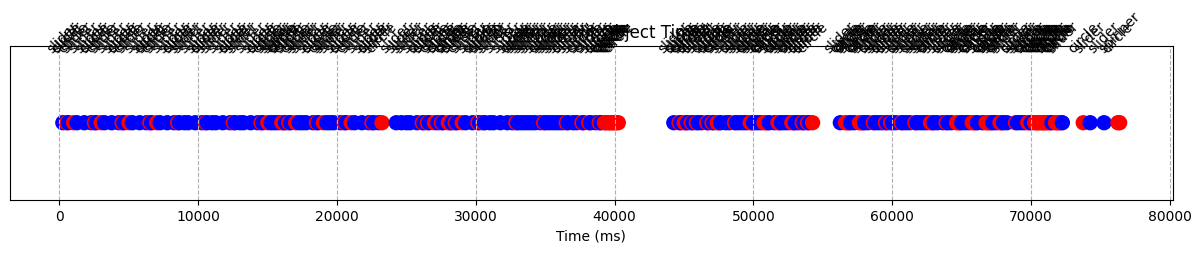

In [55]:
import matplotlib.pyplot as plt

example_df = df = hit_objects_df[hit_objects_df["ID"] == "2269930-0"].copy()
example_df["Color"] = example_df["Type"].apply(lambda t: "blue" if t == "slider" else "red")

plt.figure(figsize=(15, 2))
plt.scatter(example_df["Time"], [1] * len(example_df), c=example_df["Color"], s=100, label="Hit Objects")

for _, row in example_df.iterrows():
    plt.text(row["Time"], 1.05, row["Type"], ha='center', fontsize=10, rotation=45)

plt.yticks([])
plt.xlabel("Time (ms)")
plt.title("osu! Beatmap Hit Object Timeline")
plt.grid(axis="x", linestyle="--")
plt.show()

In [56]:
time_points_df.head()

,ID,time,beat_length,meter,sample_set,sample_index,volume,uninherited,effects
0,1509063-0,3581.0,344.827586,4,3,1,60,1.0,0.0
1,1509063-0,3581.0,-108.695652,4,3,1,60,0.0,0.0
2,1509063-0,4529.0,-108.695652,4,3,1,5,0.0,0.0
3,1509063-0,4615.0,-108.695652,4,3,1,60,0.0,0.0
4,1509063-0,5908.0,-108.695652,4,3,1,5,0.0,0.0


In [82]:
empty_cells = time_points_df[time_points_df.isna().any(axis=1)]
empty_cells

,ID,time,beat_length,meter,sample_set,sample_index,volume,uninherited,effects
243573,3730-0,14538.0,375.000000,4,2,0,100,1.0,NaN
243574,3730-1,14538.0,375.000000,4,2,0,100,1.0,NaN
619711,1219078-0,301.0,NaN,4,2,0,0,0.0,0.0
619716,1219078-0,1800.0,NaN,4,2,0,0,0.0,0.0
619729,1219078-0,5488.0,NaN,4,2,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
641751,4651-2,158111.0,333.333333,4,1,0,50,1.0,NaN
807935,1652-0,1100.0,370.690720,4,1,0,100,NaN,NaN
807936,1652-1,1100.0,370.690720,4,1,0,100,NaN,NaN
807937,1652-2,1100.0,370.690720,4,1,0,100,NaN,NaN


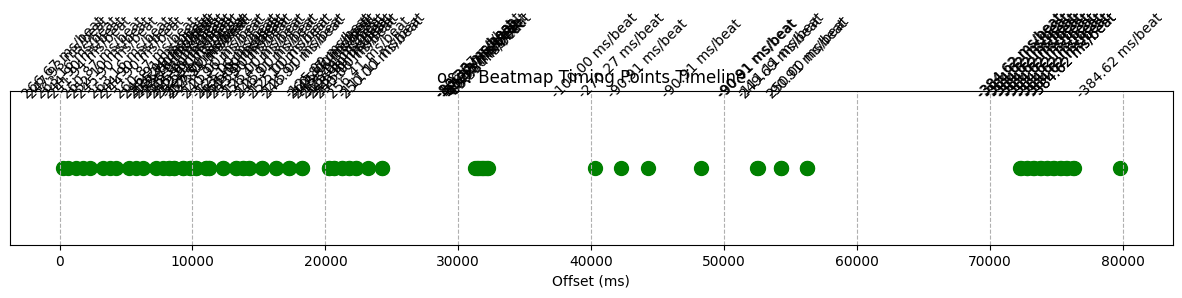

In [26]:
import matplotlib.pyplot as plt

example_t_df = df = time_points_df[time_points_df["ID"] == "2269930-0"].copy()

plt.figure(figsize=(15, 2))
plt.scatter(example_t_df["offset"], [1] * len(example_t_df), c="green", s=100, label="Timing Points")

for _, row in example_t_df.iterrows():
    plt.text(row["offset"], 1.05, f"{row['ms_per_beat']:.2f} ms/beat", ha='center', fontsize=10, rotation=45)

plt.yticks([])
plt.xlabel("Offset (ms)")
plt.title("osu! Beatmap Timing Points Timeline")
plt.grid(axis="x", linestyle="--",)
plt.show()